## poisson intervals distribution

mean:97.21
max:417.0
[np.float64(86.0), np.float64(52.0), np.float64(1.0), np.float64(51.0), np.float64(12.0), np.float64(24.0), np.float64(80.0), np.float64(67.0), np.float64(43.0), np.float64(124.0), np.float64(46.0), np.float64(138.0), np.float64(47.0), np.float64(118.0), np.float64(411.0), np.float64(43.0), np.float64(164.0), np.float64(41.0), np.float64(48.0), np.float64(86.0), np.float64(297.0), np.float64(12.0), np.float64(249.0), np.float64(19.0), np.float64(400.0), np.float64(70.0), np.float64(134.0), np.float64(159.0), np.float64(149.0), np.float64(87.0), np.float64(117.0), np.float64(102.0), np.float64(30.0), np.float64(19.0), np.float64(2.0), np.float64(14.0), np.float64(55.0), np.float64(77.0), np.float64(36.0), np.float64(164.0), np.float64(4.0), np.float64(7.0), np.float64(4.0), np.float64(189.0), np.float64(417.0), np.float64(18.0), np.float64(73.0), np.float64(40.0), np.float64(33.0), np.float64(3.0), np.float64(21.0), np.float64(29.0), np.float64(170.0), np.float64(20

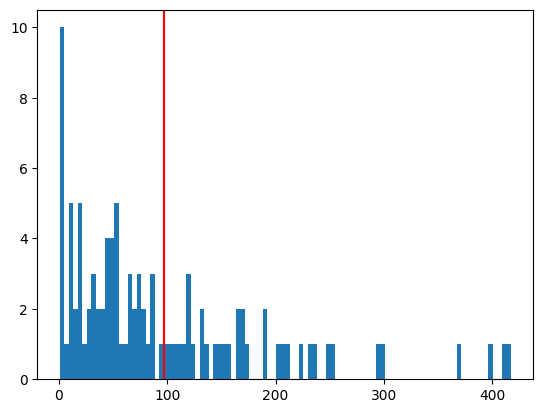

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

stepsLenght = []
for i in range(100):
    roll= np.ceil(np.random.exponential(100))
    stepsLenght.append(roll)
    # print(roll)

stepsPos = [0] * len(stepsLenght)
        
for i in range(len(stepsLenght)):
    if(i == 0):
        stepsPos[0] = stepsLenght[0]
    else:
        stepsPos[i] = stepsPos[i-1] + stepsLenght[i]

plt.hist(stepsLenght,100)
plt.axvline(np.mean(stepsLenght), color='red')
print("mean:" + str(np.mean(stepsLenght)) +"\nmax:" + str(np.max(stepsLenght)))
print(stepsLenght)
print(stepsPos)

# sns.distplot(np.random.exponential(size=1000000), hist=true)


# test #1

## normal

659000
879000
893000


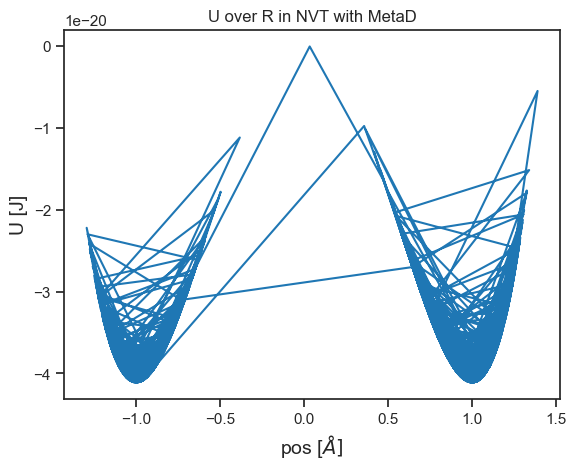

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

df = pd.read_csv("simForMetaD_low.log", sep='\s+')

xyz = open("SimForMetaD_low.xyz", 'r')
posX, posY, posZ, time = ([] for i in range(4))
count = 0
for i in xyz:
    line = i.split()
    if(count % 3 == 1):
        time.append(line[1])
    elif(count % 3 == 2):
        posX.append(float(line[1]))
        posY.append(float(line[2]))
        posZ.append(float(line[3]))
    count += 1
xyz.close()

for i in range(1, len(posX)):
    if(posX[i -1] * posX[i] < 0):
        print(time[i])

plt.title("U over R in NVT with MetaD")
plt.xlabel(r"pos [$\AA ]$")
plt.ylabel("U [J]")
plt.plot(posX, df['U'])

659000.0
879000.0
893000.0


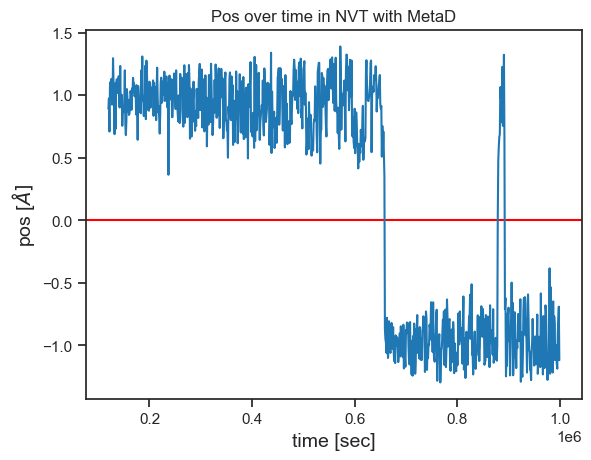

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

xyz = open("SimForMetaD_low.xyz", 'r')
posX, posY, posZ, time = ([] for i in range(4))
count = 0
for i in xyz:
    line = i.split()
    if(count % 3 == 1):
        time.append(float(line[1]))
    elif(count % 3 == 2):
        posX.append(float(line[1]))
        # posY.append(float(line[2]))
        # posZ.append(float(line[3]))
    count += 1
xyz.close()

for i in range(1, len(posX)):
    if(posX[i -1] * posX[i] < 0):
        print(time[i])

plt.title("Pos over time in NVT with MetaD")
plt.xlabel("time [sec]")
plt.ylabel(r"pos [$\AA ]$")
plt.axhline(0, color='red')
plt.plot(time, posX)

## with Poisson distribution

516000
746000
928000


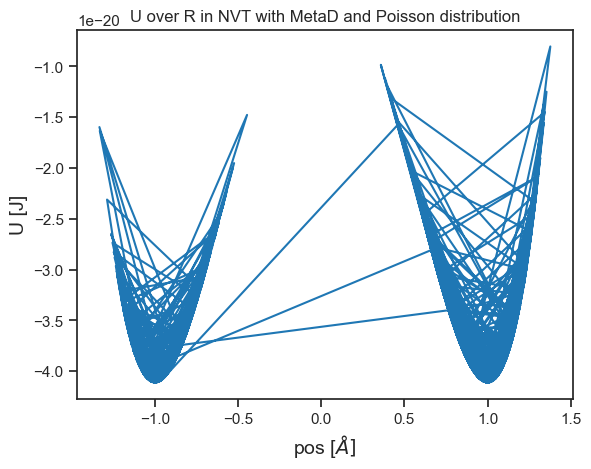

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

df = pd.read_csv("simForMetaD_lowWithDist.log", sep='\s+')

xyz = open("SimForMetaD_lowWithDist.xyz", 'r')
posX, posY, posZ, time = ([] for i in range(4))
count = 0
for i in xyz:
    line = i.split()
    if(count % 3 == 1):
        time.append(line[1])
    elif(count % 3 == 2):
        posX.append(float(line[1]))
        posY.append(float(line[2]))
        posZ.append(float(line[3]))
    count += 1
xyz.close()

for i in range(1, len(posX)):
    if(posX[i -1] * posX[i] < 0):
        print(time[i])

plt.title("U over R in NVT with MetaD and Poisson distribution")
plt.xlabel(r"pos [$\AA ]$")
plt.ylabel("U [J]")
plt.plot(posX, df['U'])

516000.0
746000.0
928000.0


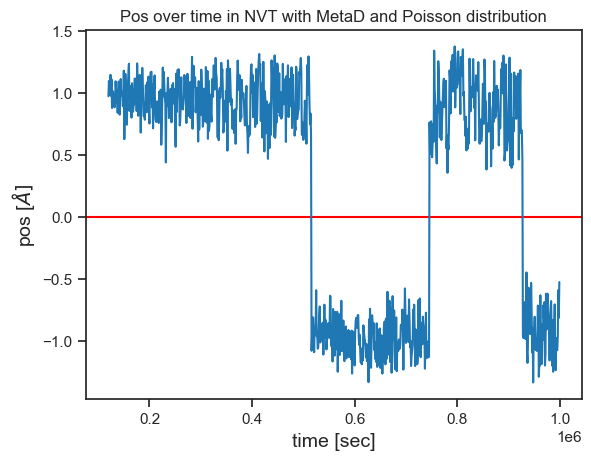

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

xyz = open("SimForMetaD_lowWithDist.xyz", 'r')
posX, posY, posZ, time = ([] for i in range(4))
count = 0
for i in xyz:
    line = i.split()
    if(count % 3 == 1):
        time.append(float(line[1]))
    elif(count % 3 == 2):
        posX.append(float(line[1]))
        # posY.append(float(line[2]))
        # posZ.append(float(line[3]))
    count += 1
xyz.close()

for i in range(1, len(posX)):
    if(posX[i -1] * posX[i] < 0):
        print(time[i])

plt.title("Pos over time in NVT with MetaD and Poisson distribution")
plt.xlabel("time [sec]")
plt.ylabel(r"pos [$\AA ]$")
plt.axhline(0, color='red')
plt.plot(time, posX)

# test 2

## normal

1051000
1819000
1884000


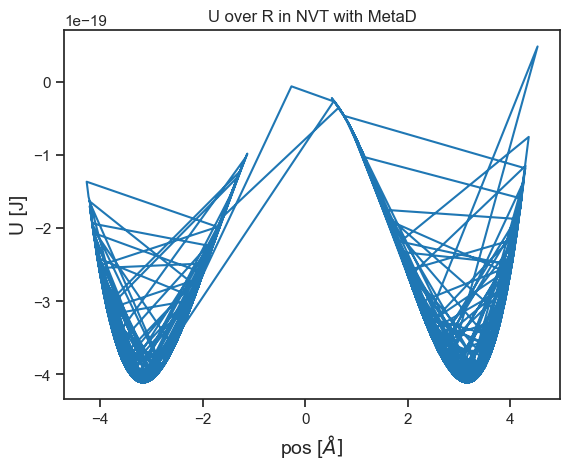

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

df = pd.read_csv("simForMetaD_lowDeep.log", sep='\s+')

xyz = open("SimForMetaD_lowDeep.xyz", 'r')
posX, posY, posZ, time = ([] for i in range(4))
count = 0
for i in xyz:
    line = i.split()
    if(count % 3 == 1):
        time.append(line[1])
    elif(count % 3 == 2):
        posX.append(float(line[1]))
        posY.append(float(line[2]))
        posZ.append(float(line[3]))
    count += 1
xyz.close()

for i in range(1, len(posX)):
    if(posX[i -1] * posX[i] < 0):
        print(time[i])

plt.title("U over R in NVT with MetaD")
plt.xlabel(r"pos [$\AA ]$")
plt.ylabel("U [J]")
plt.plot(posX, df['U'])

1051000.0
1819000.0
1884000.0


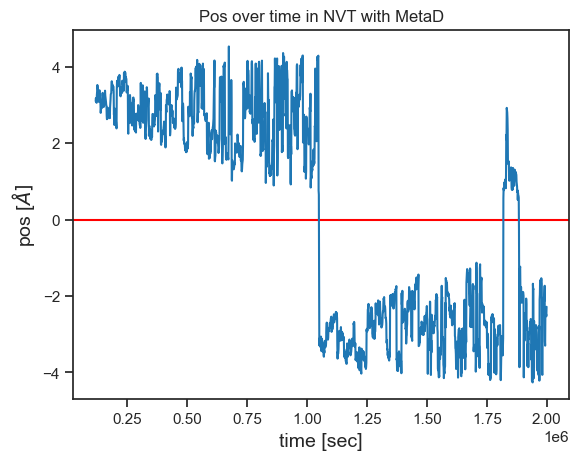

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

xyz = open("SimForMetaD_lowDeep.xyz", 'r')
posX, posY, posZ, time = ([] for i in range(4))
count = 0
for i in xyz:
    line = i.split()
    if(count % 3 == 1):
        time.append(float(line[1]))
    elif(count % 3 == 2):
        posX.append(float(line[1]))
        # posY.append(float(line[2]))
        # posZ.append(float(line[3]))
    count += 1
xyz.close()

for i in range(1, len(posX)):
    if(posX[i -1] * posX[i] < 0):
        print(time[i])

plt.title("Pos over time in NVT with MetaD")
plt.xlabel("time [sec]")
plt.ylabel(r"pos [$\AA ]$")
plt.axhline(0, color='red')
plt.plot(time, posX)

## with Poisson distribution

1051000
1819000
1884000


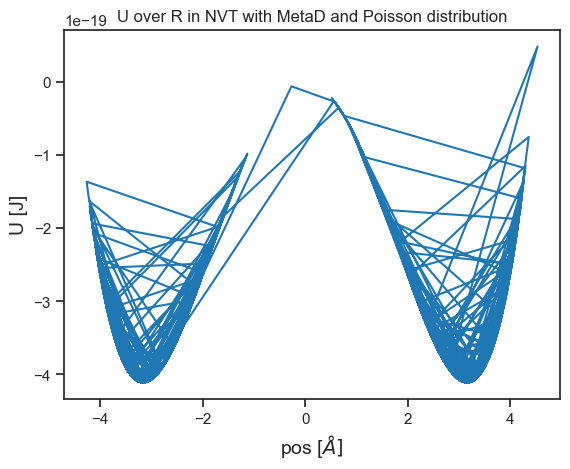

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

df = pd.read_csv("simForMetaD_lowWithDistDeep.log", sep='\s+')

xyz = open("SimForMetaD_lowWithDistDeep.xyz", 'r')
posX, posY, posZ, time = ([] for i in range(4))
count = 0
for i in xyz:
    line = i.split()
    if(count % 3 == 1):
        time.append(line[1])
    elif(count % 3 == 2):
        posX.append(float(line[1]))
        posY.append(float(line[2]))
        posZ.append(float(line[3]))
    count += 1
xyz.close()

for i in range(1, len(posX)):
    if(posX[i -1] * posX[i] < 0):
        print(time[i])

plt.title("U over R in NVT with MetaD and Poisson distribution")
plt.xlabel(r"pos [$\AA ]$")
plt.ylabel("U [J]")
plt.plot(posX, df['U'])

1051000.0
1819000.0
1884000.0


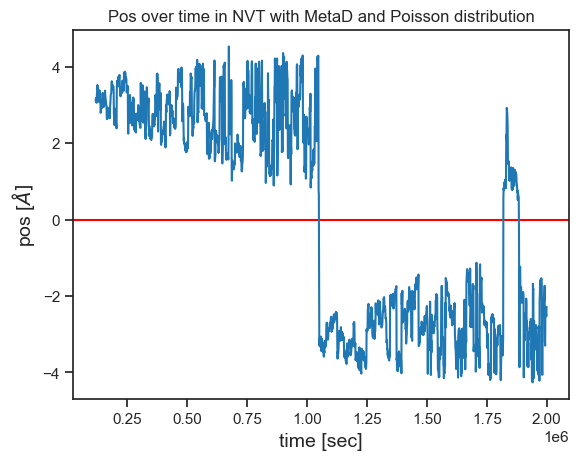

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

xyz = open("SimForMetaD_lowWithDistDeep.xyz", 'r')
posX, posY, posZ, time = ([] for i in range(4))
count = 0
for i in xyz:
    line = i.split()
    if(count % 3 == 1):
        time.append(float(line[1]))
    elif(count % 3 == 2):
        posX.append(float(line[1]))
        # posY.append(float(line[2]))
        # posZ.append(float(line[3]))
    count += 1
xyz.close()

for i in range(1, len(posX)):
    if(posX[i -1] * posX[i] < 0):
        print(time[i])

plt.title("Pos over time in NVT with MetaD and Poisson distribution")
plt.xlabel("time [sec]")
plt.ylabel(r"pos [$\AA ]$")
plt.axhline(0, color='red')
plt.plot(time, posX)